In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [29]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [30]:
# without csv
import requests
from bs4 import BeautifulSoup

result = requests.get("https://gppbgovph.com/awardedcontracts.php")
src = str(result.content)

end = src.find("editoptions\":{\"value")
start = src.find("All;")
final_legend = src[start+4:end-4]

final_legend = final_legend.split(";")
legend_dict = {}
for x in final_legend:
    new_legend = x.split(":")
    legend_dict[int(new_legend[0])] = new_legend[1]

In [31]:
df = pd.read_excel("Grid_AwardedContracts_2020-08-03.xlsx")

In [32]:
remove_these_columns = ["Notice Of Award","Contract/PO","Annual Procurement Plan"]
df.drop(columns=remove_these_columns,inplace=True)

In [33]:
df.head()

,Project Name,Approved Budget,Start Date,End Date,Name Of Awarded Company,Amount Awarded,Date Of Award,Acceptance Date,Procuring Entity
0,Human Grade Disinfectant Solution and Face Mas...,108864.00,2020-04-08,2020-04-18,Bauertek Corporation,108864.00,2020-04-02,2020-04-08,2
1,Procurement of relief goods,686000.00,2020-04-16,2020-04-23,Tina's Dried Fish and Egg Dealer,632800.00,2020-04-16,2020-04-16,12
2,Procurement of relief goods,686000.00,2020-04-16,2020-04-23,Tina's Dried Fish and Eggs,632800.00,2020-04-15,2020-04-15,12
3,Procurement of Relief Goods,1577000.00,2020-04-17,2020-04-24,Green Season Rice Mill & Grain Center,1535500.00,2020-04-15,2020-04-15,12
4,Procurement of Various Medical Supplies for It...,64900000.00,2020-03-24,2020-05-22,"Rebmann, Inc.",64790000.00,2020-03-16,2020-03-18,42


In [34]:
df['Procuring Entity'] = df['Procuring Entity'].replace(legend_dict)

In [35]:
df_sorted = df.copy().sort_values(by="Amount Awarded",ascending=False)
df_sorted.reset_index(drop=True,inplace=True)

In [36]:
df_sorted.head()

,Project Name,Approved Budget,Start Date,End Date,Name Of Awarded Company,Amount Awarded,Date Of Award,Acceptance Date,Procuring Entity
0,Supply and Delivery of Personal Protective Equ...,3846000000.00,2020-05-08,2020-06-07,Pharmally Pharmaceutical Corporation,3820000000.00,2020-05-06,2020-05-06,PROCUREMENT SERVICE
1,Supply and Delivery of Testing Kits for COVID ...,2877300000.00,2020-06-09,2020-06-24,Pharmally Pharmaceutical Corporation,2877300000.00,2020-06-08,2020-06-08,Procurement Service - DBM
2,SUPPLY AND DELIVERY OF PERSONAL PROTECTIVE EQU...,1923000000.00,2020-05-08,2020-06-07,XUZHOU CONSTRUCTION MACHINERY GROUP IMP. AND E...,1898000000.00,2020-05-07,2020-05-07,PROCUREMENT SERVICE
3,Supply and Delivery of Personal Protective Equ...,790000000.00,2020-06-29,2020-08-13,Ferjan Healthlink Philippines Inc.,727500000.00,2020-06-19,2020-06-19,PROCUREMENT SERVICE
4,Supply and Delivery of Testing Kits for COVID ...,760000000.00,2020-04-24,2020-07-31,Pharmally Pharmaceutical Corporation,688000000.00,2020-04-23,2020-04-23,Procurement Service - DBM


In [37]:
df_cleaned = df_sorted.copy()
df_cleaned["Category"] = "Not classified"
df_cleaned

,Project Name,Approved Budget,Start Date,End Date,Name Of Awarded Company,Amount Awarded,Date Of Award,Acceptance Date,Procuring Entity,Category
0,Supply and Delivery of Personal Protective Equ...,3846000000.00,2020-05-08,2020-06-07,Pharmally Pharmaceutical Corporation,3820000000.00,2020-05-06,2020-05-06,PROCUREMENT SERVICE,Not classified
1,Supply and Delivery of Testing Kits for COVID ...,2877300000.00,2020-06-09,2020-06-24,Pharmally Pharmaceutical Corporation,2877300000.00,2020-06-08,2020-06-08,Procurement Service - DBM,Not classified
2,SUPPLY AND DELIVERY OF PERSONAL PROTECTIVE EQU...,1923000000.00,2020-05-08,2020-06-07,XUZHOU CONSTRUCTION MACHINERY GROUP IMP. AND E...,1898000000.00,2020-05-07,2020-05-07,PROCUREMENT SERVICE,Not classified
3,Supply and Delivery of Personal Protective Equ...,790000000.00,2020-06-29,2020-08-13,Ferjan Healthlink Philippines Inc.,727500000.00,2020-06-19,2020-06-19,PROCUREMENT SERVICE,Not classified
4,Supply and Delivery of Testing Kits for COVID ...,760000000.00,2020-04-24,2020-07-31,Pharmally Pharmaceutical Corporation,688000000.00,2020-04-23,2020-04-23,Procurement Service - DBM,Not classified
...,...,...,...,...,...,...,...,...,...,...
11692,Production of Mailbox Disinfectant,267989.90,2020-03-31,2020-04-15,HVF CYCLE PARTS CENTER,50.00,2020-04-14,2020-04-14,SOUTHERN LEYTE STATE UNIVERSITY,Not classified
11693,Purchase of Face Materials for Face Shields Fa...,45940.00,2020-04-01,2020-04-14,Junnel's Dry Goods Store,50.00,2020-04-01,2020-04-10,Philippine Science High School-Central Visayas...,Not classified
11694,Production of Disinfectant Solution and Produc...,179735.57,2020-03-23,2020-04-07,ARIEL A. LUZON GENERAL MERCHANDISE,39.00,2020-04-07,2020-04-07,SOUTHERN LEYTE STATE UNIVERSITY,Not classified
11695,Production of Disinfectant Solution and Produc...,179735.57,2020-03-23,2020-04-07,YANNIS HARDWARE,30.00,2020-04-02,2020-04-02,SOUTHERN LEYTE STATE UNIVERSITY,Not classified


In [38]:
total_amount_awarded = df_cleaned["Amount Awarded"].sum(axis=0)
total_amount_awarded = total_amount_awarded.round(2)
total_amount_awarded

35955162449.02

In [39]:
money = 0
indices = []
num_of_rows = len(df_cleaned)
while True:
    try:
        cutoff_float = float(input("Enter a number for the cutoff point: "))

        while cutoff_float > 1 or cutoff_float < 0:
            try:
                print("Invalid Input.")
                cutoff_float = float(input("Enter a number for the cutoff point: "))

            except:
                pass

        for index,row in df_cleaned.iterrows():
            if money/total_amount_awarded >= cutoff_float:
                break
            else:
                indices.append(index)
                money += row[5]

        print("The top",indices[-1]+1,"rows (out of {num}) comprise at least {cutoff:.2f}% of the Total Amount Awarded".format(num = num_of_rows, cutoff = cutoff_float*100))
        break
    except:
        print("Invalid Input.")



Enter a number for the cutoff point: 
Invalid Input.
Enter a number for the cutoff point: 0.75
The top 422 rows (out of 11697) comprise at least 75.00% of the Total Amount Awarded


Values greater than or equal to this amount is considered "big": 10000000

The top 440 rows (out of 11697) are considered "big" bids (3.76% of all rows).
Together, all these "big" bids equal to 75.53% of the Total Amount Awarded

The remaining 11257 rows are all considered "small" bids (96.24% of all rows).
These 11257 account for 24.47% of the Total Amount Awarded


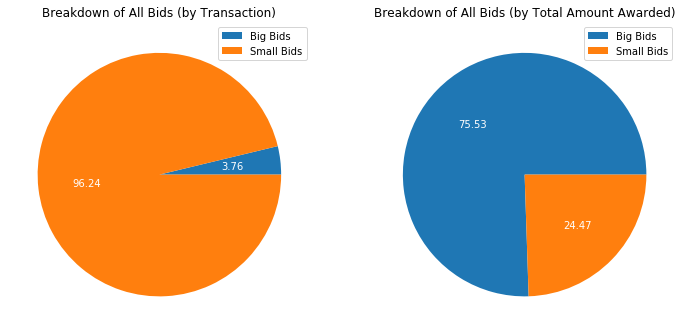

In [40]:
indices = []
num_of_rows = len(df_cleaned)
money = 0
while True:
    try:
        cutoff_flat = float(input('Values greater than or equal to this amount is considered "big": '))
        
        for index,row in df_cleaned.iterrows():
            if row[5] < cutoff_flat:
                break
            else:
                indices.append(index)
                money += row[5]
        
        rows = indices[-1]+1
        row_ratio_bigbids = rows/num_of_rows
        row_ratio_smallbids = 1-row_ratio_bigbids
        print("\nThe top",rows,'rows (out of {num}) are considered "big" bids ({percentage:.2f}% of all rows).'.format(num=num_of_rows,percentage = row_ratio_bigbids*100))
        
        total_ratio_big = money/total_amount_awarded
        total_ratio_small = 1-total_ratio_big
        print('Together, all these "big" bids equal to {percentage:.2f}% of the Total Amount Awarded'.format(percentage=total_ratio_big*100))
        print('\nThe remaining {diff} rows are all considered "small" bids ({percentage:.2f}% of all rows).'.format(diff = num_of_rows - rows, percentage = row_ratio_smallbids*100))
        print("These {diff} account for {percentage:.2f}% of the Total Amount Awarded".format(diff=num_of_rows-rows,percentage=total_ratio_small*100))
        break
    except:
        print("Invalid Input.")
        

fig,ax = plt.subplots(1,2,figsize = (12,6))

ax[0].pie(x=[row_ratio_bigbids,row_ratio_smallbids],autopct="%.2f",textprops={'color':"w"})
ax[0].title.set_text("Breakdown of All Bids (by Transaction)")
ax[0].legend(labels=["Big Bids","Small Bids"])

ax[1].pie(x=[total_ratio_big,total_ratio_small],autopct="%.2f",textprops={'color':"w"})
ax[1].title.set_text("Breakdown of All Bids (by Total Amount Awarded)")
ax[1].legend(labels=["Big Bids","Small Bids"])

plt.show()


# Note to self:  

### Keywords:  
Medical = [Personal Protective Equipment, PPE, Department of Health, DOH, Testing Kit, Test Kit, N95, Surgical Mask, Pipette, Hygiene Kit, Gown, Goggles, Alcohol, Gloves, Coverall, ventilator, Medical, Hospital, Health, RT-PCR, testing, medicin, detection, vitamin, mask, laboratory, lab, PCR, extraction, kit, CT Scan]
  
Food = [Rice, Corned Beef, Beef Loaf, Relief Good, Seed, NSIC, Food, Water, grocery, Sardines, milk]  

### Not sure if correct:


CT Scan Machine (categorized as Medical, index is somewhere in (120-140))  
patient vehicle (categorized as Others, index is somewhere in (220-240))  

Construction of Hospital-Based Health Isolation Facilities for COVID-19 Patients and Health Care Professionals, EVRMC Cabalawan, Tacloban City :  Medical (280-300)

FURNISHING LABOR AND MATERIALS FOR THE CONSTRUCTION OF BULACAN MOLECULAR DIAGNOSTIC LABORATORY AT BULACAN MEDICAL CENTER, CAPITOL COMPOUND, CITY OF MALOLOS, BULACAN :  Others (360-380)

# 4. Categorizing by money procured by the procuring entity

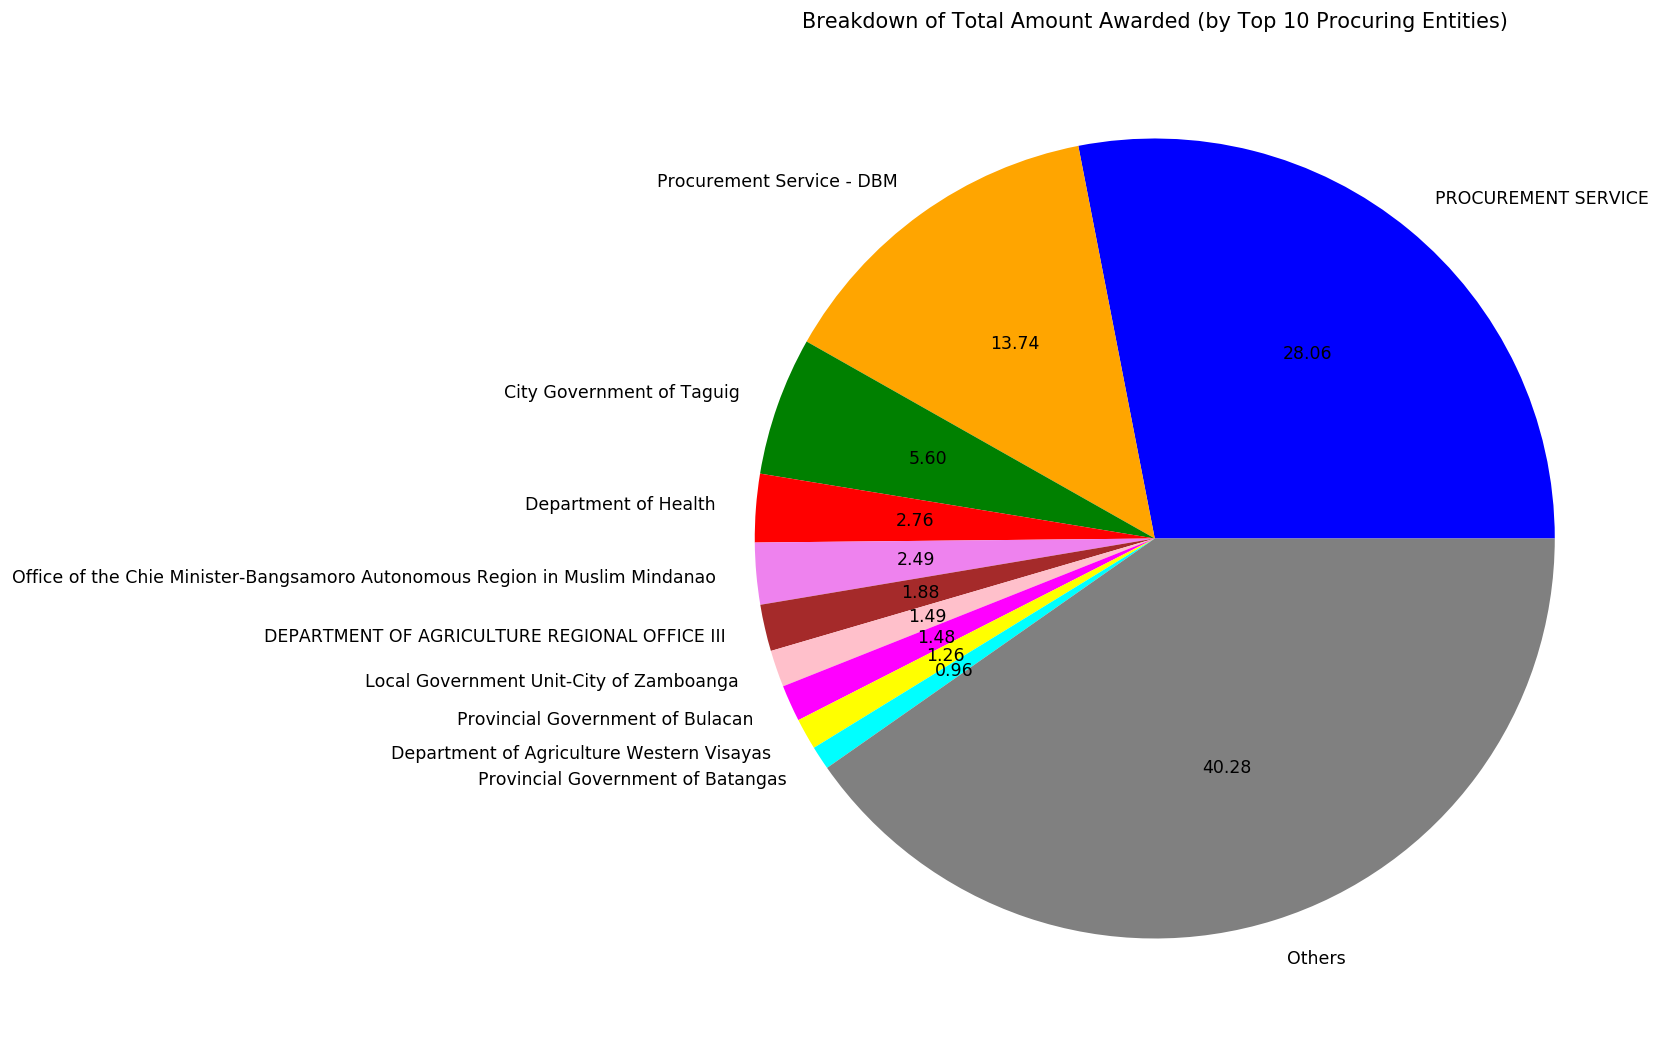

"Others" comprise 781 procuring entities.


In [41]:
df_Money_by_ProcuringEntity = df_cleaned.copy()

removelist = ['Project Name', 'Approved Budget', 'Start Date', 'End Date',
       'Name Of Awarded Company', 'Date Of Award',
       'Acceptance Date', 'Category']

df_Money_by_ProcuringEntity.drop(columns = removelist,inplace=True)

df_Money_by_ProcuringEntity = df_Money_by_ProcuringEntity[["Procuring Entity","Amount Awarded"]]



df_sorted_Money_by_ProcuringEntity = df_Money_by_ProcuringEntity.groupby(["Procuring Entity"]).sum().copy()

df_sorted_Money_by_ProcuringEntity.sort_values(by="Amount Awarded",ascending=False,inplace=True)

df_sorted_Money_by_ProcuringEntity.reset_index(inplace=True)

total = total_amount_awarded.copy()

df_sorted_Money_by_ProcuringEntity["Ratio from Total Money"] = df_sorted_Money_by_ProcuringEntity["Amount Awarded"].divide(total)

#Graph

names = df_sorted_Money_by_ProcuringEntity.loc[0:9,"Procuring Entity"]
ratio = df_sorted_Money_by_ProcuringEntity.loc[0:9,"Ratio from Total Money"]

first10 = pd.DataFrame(columns = ["Procuring Entity","Ratio from Total Money"],data=df_sorted_Money_by_ProcuringEntity.iloc[0:10,-1])
sum10ratio = first10["Ratio from Total Money"].sum()

others_ratio = 1 - sum10ratio
others = pd.Series(["Others"])
names = names.append(others)
others_ratio = pd.Series([others_ratio])
ratio = ratio.append(others_ratio)

fig = plt.figure(figsize = (8,8),dpi=125)
ax = fig.add_axes([0,0,1,1])

ax.title.set_text('Breakdown of Total Amount Awarded (by Top 10 Procuring Entities)')

ax.pie(x = ratio,autopct='%.2f',labels=names,colors=["blue","orange","green","red","violet","brown","pink","magenta","yellow","cyan","gray"])
plt.show()

count = df_sorted_Money_by_ProcuringEntity.count()["Procuring Entity"]
print('"Others" comprise {diff} procuring entities.'.format(diff=count-10))

# Code used for manual categorization 

#Manual renaming per row, manually noted "keywords" for automatic sorting later on

money = 0
indices = []
for index,row in df_cleaned.iterrows():
    
    if money/total_amount_awarded >= 0.75:
        break
    else:
        indices.append(index)
    
        if index%20 == 0:
            print("\n",index,"\n")

        df_cleaned.loc[index,"Category"] = input(df_cleaned.iloc[index,0]+" :  ")
        money += row[5]